## Investigating Fandango Movie Ratings

A data journalist named Walt Hickey analyzed movie ratings data and found strong evidence to suggest that Fandango's rating system was biased and dishonest. He published his analysis in this [article](https://fivethirtyeight.com/features/fandango-movies-ratings/). Hickey found that there's a significant discrepancy between the number of stars displayed to users and the actual rating, which he was able to find in the HTML of the page.

In this project, we'll analyze more recent movie ratings data to determine whether there has been any change in Fandango's rating system after Hickey's analysis.

We can compare the system's characteristics previous and after the analysis. Fortunately, we have ready-made data for both these periods of time:

- Walt Hickey made the data he analyzed publicly available on [GitHub](https://github.com/fivethirtyeight/data/tree/master/fandango). We'll use the data he collected to analyze the characteristics of Fandango's rating system previous to his analysis.

- A team member from DataQuest collected movie ratings data for movies released in 2016 and 2017. The data is publicly available on [GitHub](https://github.com/mircealex/Movie_ratings_2016_17) and we'll use it to analyze the rating system's characteristics after Hickey's analysis.

In [1]:
# read in and explore the two data sets
import pandas as pd
fandango = pd.read_csv('fandango_score_comparison.csv')
movie = pd.read_csv('movie_ratings_16_17.csv')
# to display all columns of df
pd.set_option('display.max_columns',None)
print(fandango.shape)
fandango.head(5)

(146, 22)


,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,Metacritic_norm,Metacritic_user_nom,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,3.30,3.55,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,3.35,3.75,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,3.20,4.05,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,1.10,2.35,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,1.45,1.70,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [2]:
fandango.tail(5)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,Metacritic_norm,Metacritic_user_nom,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
141,Mr. Holmes (2015),87,78,67,7.9,7.4,4.0,4.0,4.35,3.90,3.35,3.95,3.70,4.5,4.0,3.5,4.0,3.5,33,7367,1348,0.0
142,'71 (2015),97,82,83,7.5,7.2,3.5,3.5,4.85,4.10,4.15,3.75,3.60,5.0,4.0,4.0,4.0,3.5,60,24116,192,0.0
143,"Two Days, One Night (2014)",97,78,89,8.8,7.4,3.5,3.5,4.85,3.90,4.45,4.40,3.70,5.0,4.0,4.5,4.5,3.5,123,24345,118,0.0
144,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,3.5,3.5,5.00,4.05,4.50,3.65,3.90,5.0,4.0,4.5,3.5,4.0,19,1955,59,0.0
145,"Kumiko, The Treasure Hunter (2015)",87,63,68,6.4,6.7,3.5,3.5,4.35,3.15,3.40,3.20,3.35,4.5,3.0,3.5,3.0,3.5,19,5289,41,0.0


In [3]:
print(movie.shape)
movie.head(5)

(214, 15)


,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


In [4]:
movie.tail(5)

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
209,X-Men: Apocalypse,2016,52,7.1,48,67,4.0,2.6,3.55,2.40,3.35,2.5,3.5,2.5,3.5
210,XX,2017,64,4.7,71,17,3.0,3.2,2.35,3.55,0.85,3.0,2.5,3.5,1.0
211,xXx: Return of Xander Cage,2017,42,5.4,43,45,4.0,2.1,2.70,2.15,2.25,2.0,2.5,2.0,2.0
212,Zoolander 2,2016,34,4.8,23,21,2.5,1.7,2.40,1.15,1.05,1.5,2.5,1.0,1.0
213,Zootopia,2016,78,8.1,98,92,4.5,3.9,4.05,4.90,4.60,4.0,4.0,5.0,4.5


### Isolate columns
We will isolate the columns that offer information about Fandango's ratings in separate variables so we have just the data we're interested in.

In [5]:
fandango = fandango.copy()[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']]
fandango.head(5)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [6]:
movie = movie.copy()[['movie', 'year', 'fandango']]
movie.head(5)

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


Our goal is to determine whether there has been any change in Fandango's rating system after Hickey's analysis. So we're interested in sampling the population at two different periods in time — previous and after Hickey's analysis. Then we can compare the two states, aiming to form a conclusion on whether Fandango has changed their rating system after Hickey's analysis.

Looking at both dataset we can conclude a few things:

#### Fandango dataset
- The fandango dataset has movies released from 2015 and the lowest amount of fandango user votes is 41 which was explained by Hickey in the [readme file](https://github.com/fivethirtyeight/data/blob/master/fandango/README.md) that he has only considered movies with at least 30 fan reviews on the website. 

#### Movie dataset
- The movie dataset only has movies released between 2016 and 2017. 

- It contains movie ratings data for the most popular movies (with a significant number of votes) based on the [readme file](https://github.com/mircealex/Movie_ratings_2016_17/blob/master/README.md).

The sampling for both datasets are not random because not every movie had equal chance to be selected as both datasets only included the more popular movies during the time of selection. The samples are probably unsuitable for our intended goal as it is not representative of the whole population because movies in 2015 could be better or worse overall when compared to 2016 and 2017.

The data for both of the datasets was collected for their author original purposes and it is not exactly what we need for our goal of this project.

### Changing the Goal of our Analysis

At this point, we have at least two alternatives: either we collect new data, either we change the goal of our analysis by placing some limitations on it.

Tweaking our goal seems a much faster choice compared to collecting new data. Also, it's almost impossible to collect a new sample previous to Hickey's analysis at this moment in time. 

We will change our goal to finding out whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016.

### Isolating the Samples

With the new goal, we now have two populations that we want to describe and compare with each other:

- All Fandango's ratings for popular movies released in 2015.
- All Fandango's ratings for popular movies released in 2016.

The term "popular" is vague and we need to define it with precision before continuing. We'll use Hickey's benchmark of 30 fan ratings and consider a movie as "popular" only if it has 30 fan ratings or more on Fandango's website.

The sample doesn't provide information about the number of fan ratings. As one of sampling criteria for our new samples is popularity we need to check if this sample is truly representative and contains popular movies (movies with over 30 fan ratings).

Let's check if there are any movies with less than 30 fan ratings in the fandango datset. The documentation states that the dataset only movies with more than 30 fan ratings. 

In [7]:
sum(fandango['Fandango_votes']<30)

0

If we explore the data sets further, we'll notice that some movies were not released in 2015 and 2016. We need to isolate only the sample points that belong to our populations of interest.

### Fandango_2015

We will rename the new samples from fandango as fandango_2015.

#### Create 'year' column by extracting from 'FILM' column

In [8]:
import re
fandango['year'] = fandango['FILM'].str[-5:-1]
fandango.head(3)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015


In [9]:
fandango['year'].value_counts()

2015    129
2014     17
Name: year, dtype: int64

In [10]:
fandango_2015 = fandango[fandango['year']=='2015']
fandango_2015['year'].value_counts()

2015    129
Name: year, dtype: int64

In [11]:
fandango_2015.head(3)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015


### Fandango_2016

We'll rename the new samples from movie dataset as fandango_2016.

#### Create new samples with movies released on 2016 only

In [12]:
movie['year'].value_counts()

2016    191
2017     23
Name: year, dtype: int64

In [13]:
fandango_2016 = movie[movie['year'] == 2016]
fandango_2016['year'].value_counts()

2016    191
Name: year, dtype: int64

## Comparing Distribution Shapes for 2015 and 2016

We can now start analyzing the two samples we isolated before. Once again, our goal is to determine whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016.

We'll start simple with making a high-level comparison between the shapes of the distributions of movie ratings for both samples.

#### Kernel density plots
Kernel density plots for the distribution of movie ratings of each sample.

([<matplotlib.axis.XTick at 0x7fc67ea852b0>,
 <a list of 11 Text xticklabel objects>)

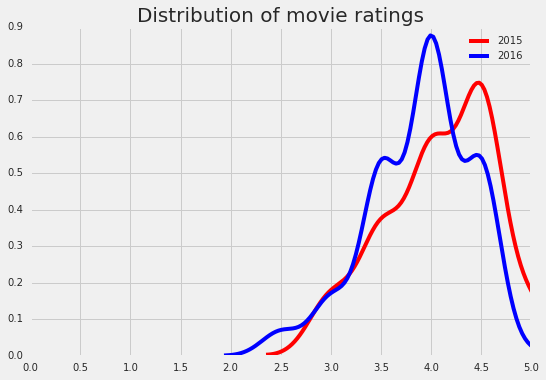

In [14]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
plt.style.use('fivethirtyeight')
sns.kdeplot(fandango_2015['Fandango_Stars'],color='r', label='2015')
sns.kdeplot(fandango_2016['fandango'],color='b', label ='2016')
plt.title('Distribution of movie ratings', fontsize=20)
plt.xlim(0,5) # rating values range from 0 to 5
plt.xticks(np.arange(0,5.1,0.5)) # range from 0 to 5 inclusive , 0.5 intervals

There are few things that are noticeable by looking at the figure:

- Both of the plots are strongly left skewed

- The 2016 plot is slightly shifted to the left compared to the 2015 plot 


The direction of the skewness suggests that the movies on Fandango have mosty very high fan ratings. The fact that Fandango sells tickets it seems like the high ratings are slightly dubious as mentioned by Hickey. This is something that is worth investigating in a separate project where we can compare with ratings from other websites. We will not continue investigating this in this porject to avoid moving away from our goal.

The left shift of the 2016 is a very interesting finding for our analysis goal. It suggest that there was a difference in the Fandango's ratings for most popular movies between 2015 and 2016. The overall distribution is lower in 2016 compared to 2015.

### Frequency Distribution Tables

In [15]:
sum(fandango_2015['Fandango_Stars'].value_counts().sort_index())

129

In [16]:
sum(fandango_2016['fandango'].value_counts().sort_index())

191

In [17]:
(191-129)/129

0.4806201550387597

Since the total number of ratings is different(about 48% more in 2016), we will use relative frequencies instead.

#### Fandango_2015 Ratings (%)

In [18]:
fandango_2015['Fandango_Stars'].value_counts(normalize=True).sort_index()*100

3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

#### Fandango_2016 Ratings (%)

In [19]:
fandango_2016['fandango'].value_counts(normalize=True).sort_index()*100

2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

#### Findings

The frequency distribution tables shows there is a clear shift of overall ratings of popular movies from 2015 and 2016 and it is very noticeable that the distribution of ratings has gone towards the lower end in 2016.

- The percentage of 5 stars ratings went down in 2016 to less than 1% which is very low considering in 2015 there's almost 7% 5 stars ratings. 
- 4.5 stars ratings has also went down from 37% to 24%. 
- The most frequent rating in 2015 was 4.5 stars and in 2016 was 4 stars. 
- The lowest star ratings for 2015 was 3 stars but in 2016 there was about 3% of 2.5 stars ratings.
- However, the proportion of 3.5 and 4 stars went up although we can argue that it is because of there's proportion of 4.5 and 5 stars went down.

We confirmed with the two tables before that there is indeed a clear difference between the two distributions. However, the direction of the difference is not as clear as it was on the kernel density plots.

## Determining the Direction of the Change
We'll take a couple of summary statistics (remember the distinction between sample statistics and population parameters) to get a more precise picture about the direction of the difference. We'll take each distribution of movie ratings and compute its mean, median, and mode, and then compare these statistics to determine what they tell about the direction of the difference.

#### Mean

In [20]:
mean_2015 = fandango_2015['Fandango_Stars'].mean()
mean_2016 = fandango_2016['fandango'].mean()
print(mean_2015)
print(mean_2016)

4.0852713178294575
3.887434554973822


#### Median

In [21]:
median_2015 = fandango_2015['Fandango_Stars'].median()
median_2016 = fandango_2016['fandango'].median()
print(median_2015)
print(median_2016)

4.0
4.0


#### Mode

In [22]:
mode_2015 = fandango_2015['Fandango_Stars'].mode()[0]# to extract value only
mode_2016 = fandango_2016['fandango'].mode()[0]
print(mode_2015)
print(mode_2016)

4.5
4.0


In [23]:
summary = pd.DataFrame()

summary['2015'] = [mean_2015,median_2015,mode_2015]
summary['2016'] = [mean_2016,median_2016,mode_2016]
summary.index = ['mean','median','mode']
summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


- The median hasn't changed in 2016.
- The mean has gone down by about 0.2 while the mode has decreased by 0.5 star in 2016.

### Grouped bar plot

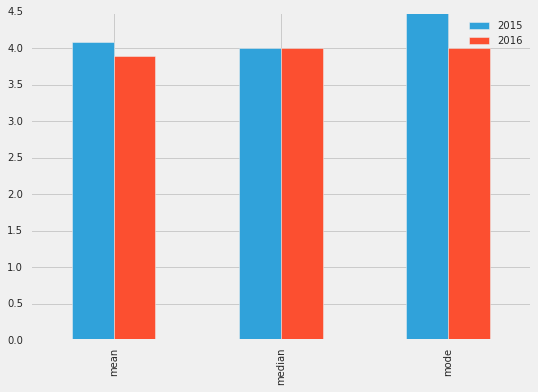

In [25]:
summary.plot.bar()

### Conclusion

Our analysis showed that there's a slight difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. We have determined that popular movies released in 2016 were generally rated lower on Fandango than popular movies released in 2015. The actual reason is unclear, one of the potential cause is [Hickey's analysis](https://fivethirtyeight.com/features/fandango-movies-ratings/) on FiveThirtyEight.com in 2015.

### Further Research
We could collect data of ratings for each movie from different website such as IMDB and Metacritics. We can then compare the differences of ratings on each website and analyse the figures to determine if Fandango's movie ratings are closer to ratings from other websites.